In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def smooth(x, N):
  L = len(x)
  x_smooth = []
  for i in range(L):
    l = max(0, i-N/2)
    u = min(L-1, i+N/2)
    x_smooth.append(np.mean(x[int(l):int(u)]))
  return x_smooth

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


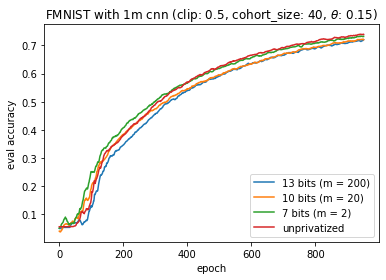

In [ ]:
# Experiment parameters
cohort_size = 40
#model_architecture = 'simple'
model_architecture = '1m_cnn'
l2_clip_norm = 0.5

# PBM parameters
local_counts = 200
scaling_factor = 0.15

# Load pbm results
for local_counts in [ 200, 20, 2]:
  dump_file_dir = '/content/drive/MyDrive/colab_dump/'  


  dump_file_name = f'pbm_cohort_{cohort_size}_counts_{local_counts}_theta_{int(100*scaling_factor):03d}_clip_{int(100*l2_clip_norm):03d}'
  dump_file_name = dump_file_name + '_' + model_architecture

  with open(dump_file_dir + dump_file_name + '_train_metrics_list.pickle', 'rb') as f:
      train_metrics_list = pickle.load(f)
  with open(dump_file_dir + dump_file_name + '_eval_metrics_list.pickle', 'rb') as f:
      eval_metrics_list = pickle.load(f)


  num_bits = int(np.log2(cohort_size*(local_counts+1))+1)
  #train_acc = [metrics["train"]["sparse_categorical_accuracy"] for metrics in train_metrics_list]
  #plt.plot(smooth(train_acc[:], 10), label=f'{num_bits} bits')
  eval_acc = [metrics["eval"]["sparse_categorical_accuracy"] for metrics in eval_metrics_list]
  plt.plot(smooth(eval_acc[:], 10), label=f'{num_bits} bits (m = {local_counts})')

# Plot centralized case
local_counts = 200
l2_clip_norm = 0.5
dump_file_name = f'central_clip_cohort_{cohort_size}_counts_{local_counts}_theta_{int(100*scaling_factor):03d}_clip_{int(100*l2_clip_norm):03d}'
dump_file_name = dump_file_name + '_' + model_architecture

with open(dump_file_dir + dump_file_name + '_train_metrics_list.pickle', 'rb') as f:
    central_train_metrics_list = pickle.load(f)
with open(dump_file_dir + dump_file_name + '_eval_metrics_list.pickle', 'rb') as f:
    central_eval_metrics_list = pickle.load(f)


#train_acc = [metrics["train"]["sparse_categorical_accuracy"] for metrics in pbm_train_metrics_list]
#plt.plot(smooth(train_acc[:], 10), label='clip only')
eval_acc = [metrics["eval"]["sparse_categorical_accuracy"] for metrics in central_eval_metrics_list]
plt.plot(smooth(eval_acc[:], 10), label='unprivatized')

'''
# Plot lr 1
local_counts = 200
l2_clip_norm = 0.03
dump_file_name = f'pbm_cohort_{cohort_size}_counts_{local_counts}_theta_{int(100*scaling_factor):03d}_clip_{int(100*l2_clip_norm):03d}_lr_1'
dump_file_name = dump_file_name + '_' + model_architecture

with open(dump_file_dir + dump_file_name + '_train_metrics_list.pickle', 'rb') as f:
    central_train_metrics_list = pickle.load(f)
with open(dump_file_dir + dump_file_name + '_eval_metrics_list.pickle', 'rb') as f:
    central_eval_metrics_list = pickle.load(f)


#train_acc = [metrics["train"]["sparse_categorical_accuracy"] for metrics in pbm_train_metrics_list]
#plt.plot(smooth(train_acc[:], 10), label='clip only')
eval_acc = [metrics["eval"]["sparse_categorical_accuracy"] for metrics in central_eval_metrics_list]
plt.plot(smooth(eval_acc[:], 5), label='lr 1')
'''

plt.title(f'FMNIST with 1m cnn (clip: {l2_clip_norm}, cohort_size: {cohort_size}, '+r'$\theta$: '+f'{scaling_factor})')
plt.ylabel('eval accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()